# Pipeline DataFrame Operations

In this notebook, I will demonstrate how to select based on dates and symbol and show you use cases for both [unstack](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html) and [reset index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html) operations. They are very useful to convert your Quantopian-produced DataFrames into visualization-friendly format.

In [1]:
from quantopian.pipeline import Pipeline, CustomFactor
from quantopian.research import run_pipeline
from quantopian.pipeline.data import USEquityPricing
from quantopian.pipeline.filters import StaticAssets
from quantopian.pipeline.factors import DailyReturns

from datetime import datetime
import pandas as pd

assets = StaticAssets(symbols(['FB', 'TSLA', 'NFLX', 'AMZN', 'GOOG']))

start_date = datetime.strptime('01/01/2018', '%m/%d/%Y') + pd.tseries.offsets.BDay(2)
end_date = datetime.strptime('01/05/2020', '%m/%d/%Y')
# end_date = datetime.strptime('01/01/2020', '%m/%d/%Y')

Build a pipeline

In [2]:
return_d2 = DailyReturns(mask=assets)

pipe = Pipeline(
    columns={
        'return_d2': return_d2
    },
    screen=assets
)

mdf = run_pipeline(pipe, start_date, end_date)

In [3]:
mdf.head(15)

return_d2
2018-01-03 00:00:00+00:00 Equity(16841 [AMZN])   0.016639
                          Equity(23709 [NFLX])   0.047235
                          Equity(39840 [TSLA])   0.028548
                          Equity(42950 [FB])     0.027816
                          Equity(46631 [GOOG])   0.017707
2018-01-04 00:00:00+00:00 Equity(16841 [AMZN])   0.011808
                          Equity(23709 [NFLX])   0.019693
                          Equity(39840 [TSLA])  -0.010241
                          Equity(42950 [FB])     0.016811
                          Equity(46631 [GOOG])   0.015962
2018-01-05 00:00:00+00:00 Equity(16841 [AMZN])   0.005486
                          Equity(23709 [NFLX])   0.002829
                          Equity(39840 [TSLA])  -0.007539
                          Equity(42950 [FB])    -0.000867
                          Equity(46631 [GOOG])   0.004067

## 1. Select by Dates and/or Symbols

Dates are level 0 and symbols are level 1 indexes. Selecting by symbol(s) is pretty straightforward as soon as you know of `DataFrame.index.get_level_values()` function:

In [10]:
mdf[mdf.index.get_level_values(1) == symbols('AMZN')].head(5)

,,return_d2
2018-01-03 00:00:00+00:00,Equity(16841 [AMZN]),0.016639
2018-01-04 00:00:00+00:00,Equity(16841 [AMZN]),0.011808
2018-01-05 00:00:00+00:00,Equity(16841 [AMZN]),0.005486
2018-01-08 00:00:00+00:00,Equity(16841 [AMZN]),0.016063
2018-01-09 00:00:00+00:00,Equity(16841 [AMZN]),0.014548


In [11]:
mdf[mdf.index.get_level_values(1).isin(symbols(['AMZN', 'FB']))].head(5)

return_d2
2018-01-03 00:00:00+00:00 Equity(16841 [AMZN])   0.016639
                          Equity(42950 [FB])     0.027816
2018-01-04 00:00:00+00:00 Equity(16841 [AMZN])   0.011808
                          Equity(42950 [FB])     0.016811
2018-01-05 00:00:00+00:00 Equity(16841 [AMZN])   0.005486

Selecting by dates is easy too as you can perform various date comparisons to get rows from particular dates:

In [14]:
from datetime import datetime

mdf[mdf.index.get_level_values(0) == datetime.strptime('2018-01-03', '%Y-%m-%d')]

return_d2
2018-01-03 00:00:00+00:00 Equity(16841 [AMZN])   0.016639
                          Equity(23709 [NFLX])   0.047235
                          Equity(39840 [TSLA])   0.028548
                          Equity(42950 [FB])     0.027816
                          Equity(46631 [GOOG])   0.017707

## 2. Unstack

Unstack operation is useful for quick-plotting by groups. When you visualize the produced DataFrame directly, you'd get the following plot:

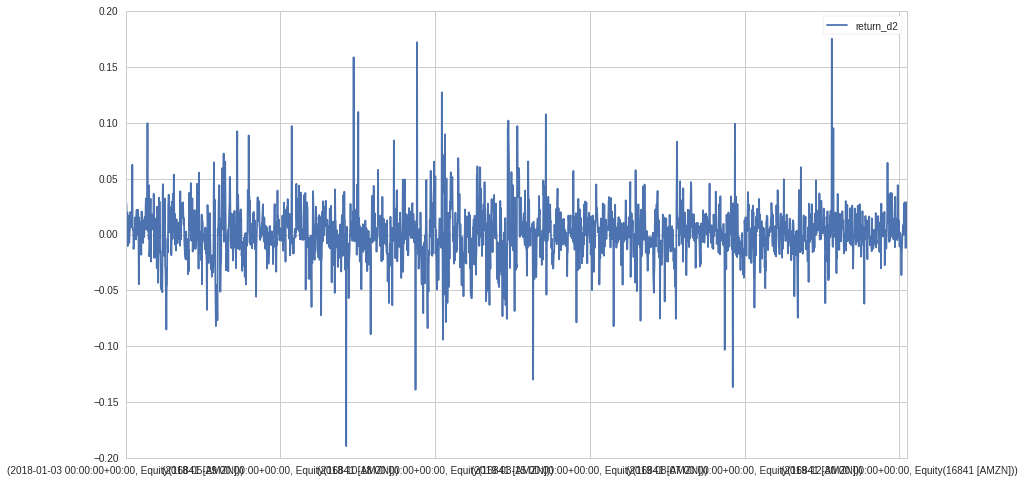

In [4]:
mdf.plot();

However, after the unstack operation, this is the produced plot:

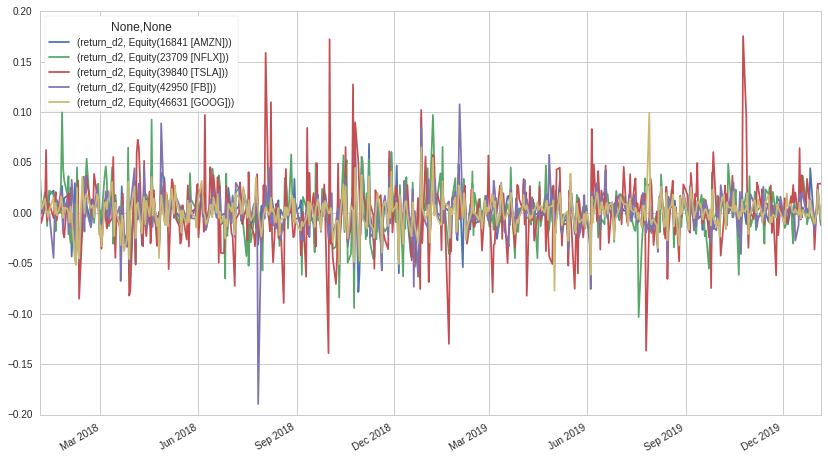

In [5]:
unstacked_mdf = mdf.unstack()
unstacked_mdf.plot();

In essence, what **unstack** operation does is converting the DataFrame so that the second row index becomes the second column index. The shape of the DataFrame thus became similar to the DataFrame we visualized in project 1.

In [6]:
unstacked_mdf.head()

return_d2                       \
                          Equity(16841 [AMZN]) Equity(23709 [NFLX])   
2018-01-03 00:00:00+00:00             0.016639             0.047235   
2018-01-04 00:00:00+00:00             0.011808             0.019693   
2018-01-05 00:00:00+00:00             0.005486             0.002829   
2018-01-08 00:00:00+00:00             0.016063             0.020328   
2018-01-09 00:00:00+00:00             0.014548             0.010629   

                                                                   \
                          Equity(39840 [TSLA]) Equity(42950 [FB])   
2018-01-03 00:00:00+00:00             0.028548           0.027816   
2018-01-04 00:00:00+00:00            -0.010241           0.016811   
2018-01-05 00:00:00+00:00            -0.007539          -0.000867   
2018-01-08 00:00:00+00:00             0.006325           0.013401   
2018-01-09 00:00:00+00:00             0.062538           0.007816   

                                                
                          Equity(46631 [GOOG])  
2018-01-03 00:00:00+00:00             0.017707  
2018-01-04 00:00:00+00:00             0.015962  
2018-01-05 00:00:00+00:00             0.004067  
2018-01-08 00:00:00+00:00             0.014230  
2018-01-09 00:00:00+00:00             0.003984

## 2. Reset Index

**Reset Index** operation converts an index to a column. 

In [18]:
mdf.index.get_level_values(0)

DatetimeIndex(['2018-01-03', '2018-01-03', '2018-01-03', '2018-01-03',
               '2018-01-03', '2018-01-04', '2018-01-04', '2018-01-04',
               '2018-01-04', '2018-01-04',
               ...
               '2020-01-03', '2020-01-03', '2020-01-03', '2020-01-03',
               '2020-01-03', '2020-01-06', '2020-01-06', '2020-01-06',
               '2020-01-06', '2020-01-06'],
              dtype='datetime64[ns, UTC]', length=2525, freq='C')

In [9]:
mdf.reset_index()

,level_0,level_1,return_d2
0,2018-01-03 00:00:00+00:00,Equity(16841 [AMZN]),0.016639
1,2018-01-03 00:00:00+00:00,Equity(23709 [NFLX]),0.047235
2,2018-01-03 00:00:00+00:00,Equity(39840 [TSLA]),0.028548
3,2018-01-03 00:00:00+00:00,Equity(42950 [FB]),0.027816
4,2018-01-03 00:00:00+00:00,Equity(46631 [GOOG]),0.017707
5,2018-01-04 00:00:00+00:00,Equity(16841 [AMZN]),0.011808
6,2018-01-04 00:00:00+00:00,Equity(23709 [NFLX]),0.019693
7,2018-01-04 00:00:00+00:00,Equity(39840 [TSLA]),-0.010241
8,2018-01-04 00:00:00+00:00,Equity(42950 [FB]),0.016811
9,2018-01-04 00:00:00+00:00,Equity(46631 [GOOG]),0.015962
